# Análisis Sociocultural y Político del Abandono Escolar en España (2023)
### Relación entre Renta Media, Gobierno Regional y Factores Socioculturales | Hugo Pérez García


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carga de ambos CSV, comprobación e inspección de estructura.
> Los datos han sido extraídos del Instituto Nacional de Estadística (INE), renta media por hogar y tasa de abandono escolar por comunidad.

In [ ]:
renta = pd.read_csv('renta_media.csv', sep=';', encoding='utf-8-sig')
abandono = pd.read_csv('abandono_escolar.csv', sep=';', encoding='utf-8-sig')

print('Renta media:')
print(renta.head())
print('Abandono escolar:')
print(abandono.head())

Renta media:
  Comunidades y Ciudades Autónomas Renta anual neta media por hogar  Periodo  \
0                   Total Nacional       Renta neta media por hogar     2024   
1                   Total Nacional       Renta neta media por hogar     2023   
2                   Total Nacional       Renta neta media por hogar     2022   
3                   Total Nacional       Renta neta media por hogar     2021   
4                   Total Nacional       Renta neta media por hogar     2020   

    Total  
0  36.996  
1  34.821  
2  32.216  
3  30.552  
4  30.690  
Abandono escolar:
   Total Nacional Comunidades y Ciudades Autónomas  periodo Total
0  Total Nacional                              NaN     2023  13,7
1  Total Nacional                     01 Andalucía     2023  16,9
2  Total Nacional                        02 Aragón     2023  10,8
3  Total Nacional       03 Asturias, Principado de     2023  10,5
4  Total Nacional                04 Balears, Illes     2023  18,0


Limpieza de renta media.

In [ ]:
renta = renta[
    (renta['Renta anual neta media por hogar'] == 'Renta neta media por hogar') &
    (renta['Periodo'] == 2023) &
    (renta['Comunidades y Ciudades Autónomas'].notna()) &
    (renta['Comunidades y Ciudades Autónomas'] != 'Total Nacional')
]

renta = renta[['Comunidades y Ciudades Autónomas', 'Total']]
renta = renta.rename(columns={
    'Comunidades y Ciudades Autónomas': 'Comunidad Autónoma',
    'Total': 'Renta Media'
    })

In [ ]:
renta['Comunidad Autónoma'] = renta['Comunidad Autónoma'].str.replace(r'^\d+\s', '', regex=True)
renta['Renta Media'] = renta['Renta Media'].astype(float)

print(renta)

              Comunidad Autónoma  Renta Media
35                     Andalucía       29.916
69                        Aragón       35.026
103      Asturias, Principado de       33.709
137               Balears, Illes       36.904
171                     Canarias       31.296
205                    Cantabria       33.373
239              Castilla y León       31.863
273         Castilla - La Mancha       29.965
307                     Cataluña       38.888
341         Comunitat Valenciana       31.324
375                  Extremadura       27.051
409                      Galicia       31.301
443         Madrid, Comunidad de       42.926
477            Murcia, Región de       30.509
511  Navarra, Comunidad Foral de       41.187
545                   País Vasco       42.760
579                    Rioja, La       33.245
613                        Ceuta       40.621
647                      Melilla       39.727


Limpieza de Abandono Escolar.

In [ ]:
abandono = abandono[
    (abandono['periodo'] == 2023) &
    (abandono['Comunidades y Ciudades Autónomas'].notna()) &
    (abandono['Comunidades y Ciudades Autónomas'] != 'Total Nacional')
]

abandono = abandono[['Comunidades y Ciudades Autónomas', 'Total']]
abandono = abandono.rename(columns={
    'Comunidades y Ciudades Autónomas': 'Comunidad Autónoma',
    'Total': 'Abandono Escolar (%)'
})

In [ ]:
abandono['Comunidad Autónoma'] = abandono['Comunidad Autónoma'].str.replace(r'^\d+\s', '', regex=True)
abandono['Abandono Escolar (%)'] = abandono['Abandono Escolar (%)'].str.replace(',', '.').astype(float)

print(abandono)

             Comunidad Autónoma  Abandono Escolar (%)
1                     Andalucía                  16.9
2                        Aragón                  10.8
3       Asturias, Principado de                  10.5
4                Balears, Illes                  18.0
5                      Canarias                  14.7
6                     Cantabria                   7.3
7               Castilla y León                  10.3
8          Castilla - La Mancha                  16.6
9                      Cataluña                  14.8
10         Comunitat Valenciana                  15.0
11                  Extremadura                   9.9
12                      Galicia                   9.1
13         Madrid, Comunidad de                  11.4
14            Murcia, Región de                  19.2
15  Navarra, Comunidad Foral de                   6.5
16                   País Vasco                   6.7
17                    Rioja, La                   9.7
18                        Ce

Unificar ambos CSV.

In [ ]:
df = pd.merge(renta, abandono, on='Comunidad Autónoma')

print(df)

             Comunidad Autónoma  Renta Media  Abandono Escolar (%)
0                     Andalucía       29.916                  16.9
1                        Aragón       35.026                  10.8
2       Asturias, Principado de       33.709                  10.5
3                Balears, Illes       36.904                  18.0
4                      Canarias       31.296                  14.7
5                     Cantabria       33.373                   7.3
6               Castilla y León       31.863                  10.3
7          Castilla - La Mancha       29.965                  16.6
8                      Cataluña       38.888                  14.8
9          Comunitat Valenciana       31.324                  15.0
10                  Extremadura       27.051                   9.9
11                      Galicia       31.301                   9.1
12         Madrid, Comunidad de       42.926                  11.4
13            Murcia, Región de       30.509                  

Visualizacion y correlación entre ambas.

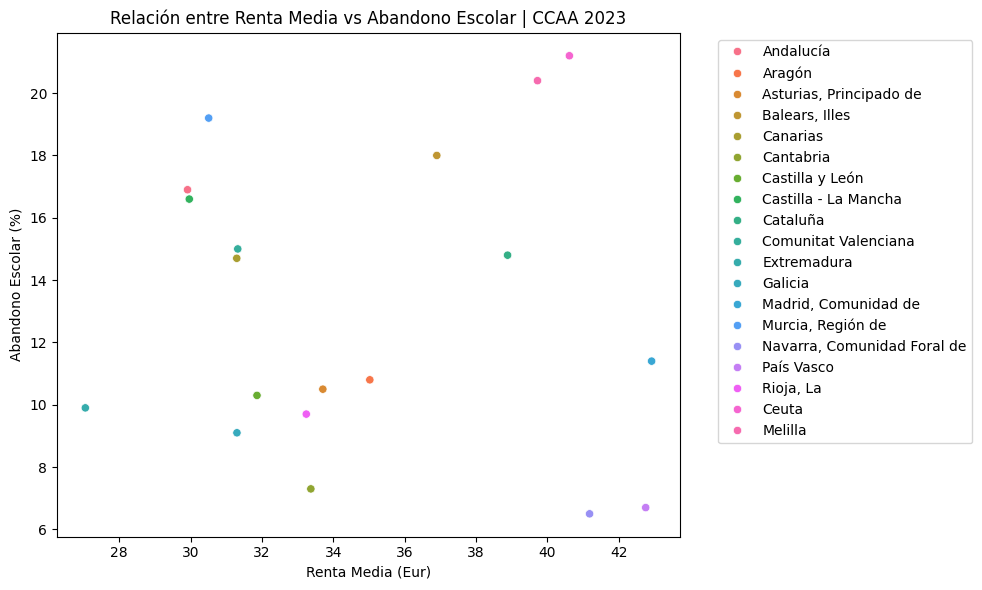

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Renta Media', y='Abandono Escolar (%)', hue='Comunidad Autónoma')
plt.title('Relación entre Renta Media vs Abandono Escolar | CCAA 2023')
plt.xlabel('Renta Media (Eur)')
plt.ylabel('Abandono Escolar (%)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

Correlación: -0.043


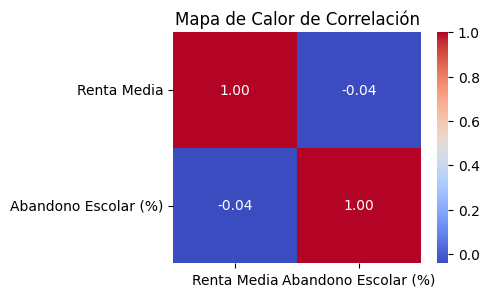

In [ ]:
corr = df['Renta Media'].corr(df['Abandono Escolar (%)'])
print(f"Correlación: {corr:.3f}")

plt.figure(figsize=(4, 3))
sns.heatmap(df[['Renta Media', 'Abandono Escolar (%)']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlación')
plt.show()

## Conclusiones e hipotesis

## Conclusión
Vemos claramente que no hay una relacion destacable entre la renta media y el abandono escolar.

## Hipotesis
* Es posible que, aunque no sea común, algunos jóvenes abandonen la escuela antes para incorporarse a un negocio familiar que funciona bien.

* El abandono escolar temprano podría estar más relacionado con factores culturales y sociales de cada comunidad autónoma que con la renta media anual por hogar.

* La ubicación geográfica, el entorno socioeconómico y la disponibilidad de empleo en sectores que no requieren alta cualificación pueden influir más que la renta media en la decisión de abandonar los estudios.

Vamos a hacer una grafica de barras que muestre los datos de manera mas visual y ordenada.

/tmp/ipython-input-37-2614092887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_abandono_sorted, x='Comunidad Autónoma', y='Abandono Escolar (%)', palette='viridis')


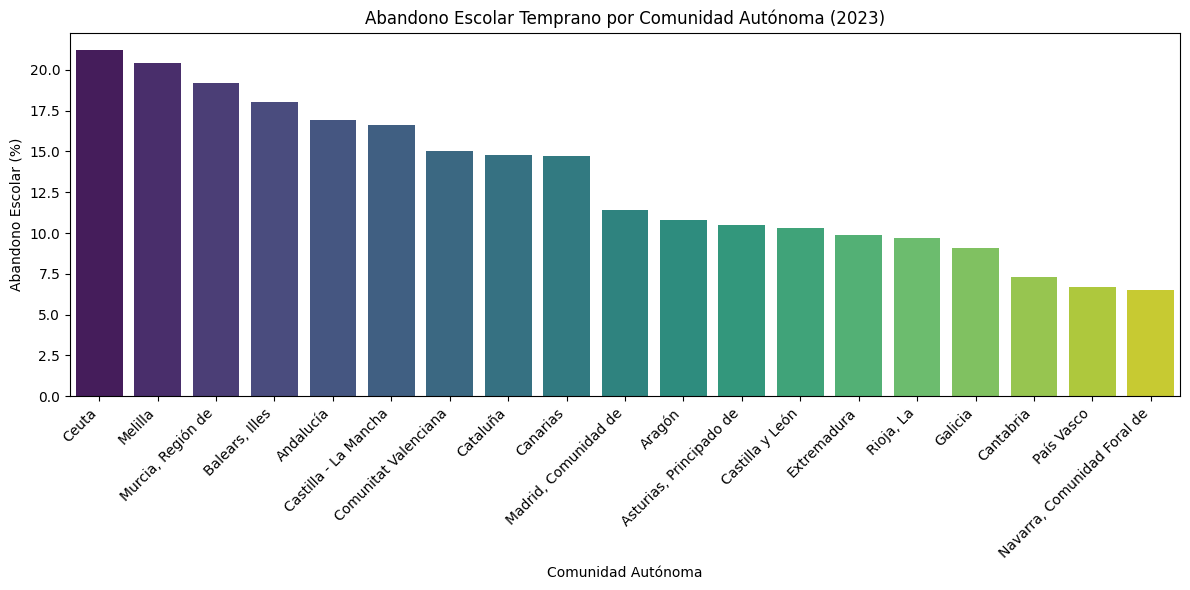

In [ ]:
df_abandono_sorted = df.sort_values('Abandono Escolar (%)', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_abandono_sorted, x='Comunidad Autónoma', y='Abandono Escolar (%)', palette='viridis')
plt.title('Abandono Escolar Temprano por Comunidad Autónoma (2023)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Abandono Escolar (%)')
plt.xlabel('Comunidad Autónoma')
plt.tight_layout()
plt.show()

/tmp/ipython-input-38-1943554429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_renta_sorted, x='Comunidad Autónoma', y='Renta Media', palette='viridis')


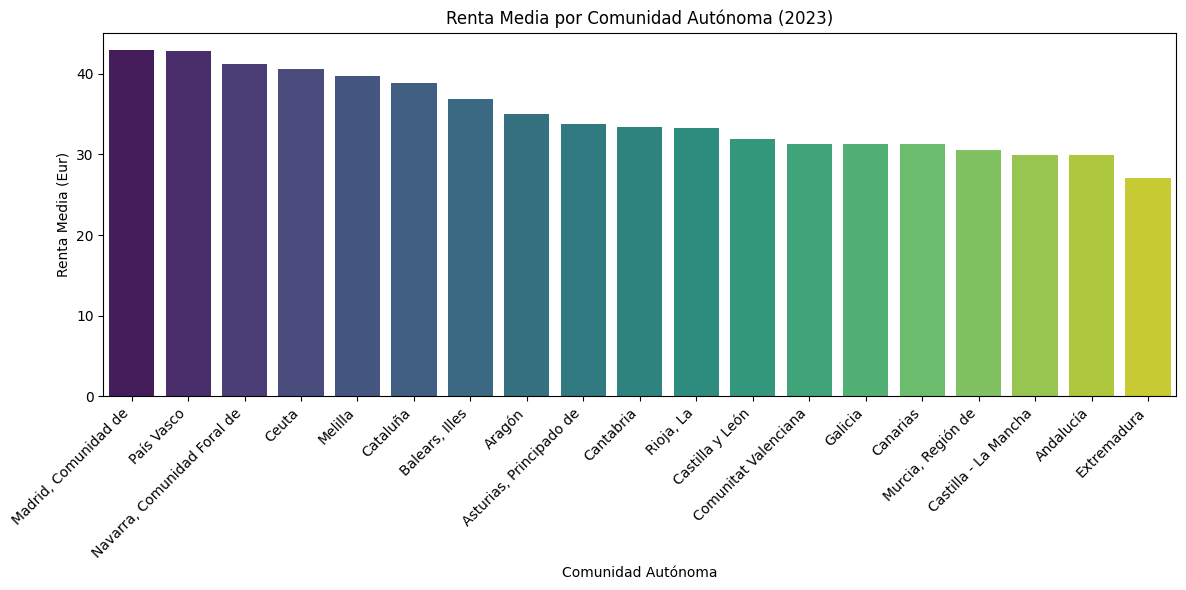

In [ ]:
df_renta_sorted = df.sort_values('Renta Media', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_renta_sorted, x='Comunidad Autónoma', y='Renta Media', palette='viridis')
plt.title('Renta Media por Comunidad Autónoma (2023)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Renta Media (Eur)')
plt.xlabel('Comunidad Autónoma')
plt.tight_layout()
plt.show()

## Estudio de gráficas
Se puede apreciar cómo Ceuta y Melilla tienen un abandono escolar muy alto y claramente destacable respecto al resto.

Murcia, Baleares, Andalucía y Castilla - La Mancha también muestran tasas de abandono escolar considerablemente elevadas.

Navarra, País Vasco y Cantabria destacan por tener un abandono muy bajo.

Madrid, País Vasco y Navarra presentan la renta más alta y el abandono escolar más bajo; en estos casos sí se cumple la relación esperada: más renta → menos abandono.

Ceuta y Melilla, sin embargo, muestran una renta media relativamente alta pero no cumplen la relación, ya que su abandono escolar es de los más altos.

Castilla - La Mancha, Andalucía y Extremadura muestran renta baja y abandono alto, ajustándose a la hipótesis de relación inversa.

Baleares tiene una renta media-alta pero un abandono escolar alto, lo que vuelve a romper la regla.

# Conclusión Final
En mi opinión, aunque a simple vista la correlación general sea muy débil, un análisis más detallado revela que sí existe una relación en muchos casos, especialmente en comunidades como Madrid, País Vasco, Navarra, Andalucía y Extremadura.

Sin embargo, algunas comunidades autónomas rompen claramente el patrón esperado, como:

Baleares, que refuerza la hipótesis de que la alta empleabilidad en sectores turísticos fomenta el abandono escolar.

Ceuta y Melilla, donde la explicación más plausible es la fuerte desigualdad social, la situación geográfica y la migración constante hacia la Península.

En conjunto, esto sugiere que para comprender completamente el abandono escolar en España, es fundamental considerar factores adicionales como la estructura económica local, la inversión educativa, la desigualdad interna y la cultura familiar.

In [ ]:
df_politica = df.copy()

partidos = {
    'Andalucía': 'PP',
    'Aragón': 'PP',
    'Asturias, Principado de': 'PSOE',
    'Balears, Illes': 'PP',
    'Canarias': 'CC+PP',
    'Cantabria': 'PP',
    'Castilla y León': 'PP+Vox',
    'Castilla - La Mancha': 'PSOE',
    'Cataluña': 'ERC',
    'Comunitat Valenciana': 'PP+Vox',
    'Extremadura': 'PP',
    'Galicia': 'PP',
    'Madrid, Comunidad de': 'PP',
    'Murcia, Región de': 'PP',
    'Navarra, Comunidad Foral de': 'PSOE',
    'País Vasco': 'PNV',
    'Rioja, La': 'PP',
    'Ceuta': 'PP',
    'Melilla': 'Independientes'
}

df_politica['Partido'] = df_politica['Comunidad Autónoma'].map(partidos)

In [ ]:
grupo_partido = df_politica.groupby('Partido').agg({
    'Renta Media': 'mean',
    'Abandono Escolar (%)': 'mean',
    'Comunidad Autónoma': 'count'
}).rename(columns={'Comunidad Autónoma': 'Num_CCAA'})

grupo_partido_reset = grupo_partido.reset_index()

In [ ]:
colores_partido = {
    'PP': '#1D84CE',
    'PSOE': '#E2001A',
    'Vox': '#58B947',
    'ERC': '#FFCC00',
    'PNV': '#009B55',
    'CC+PP': '#7BAFD4',
    'PP+Vox': '#18bc5b',
    'Independientes': '#999999'
}

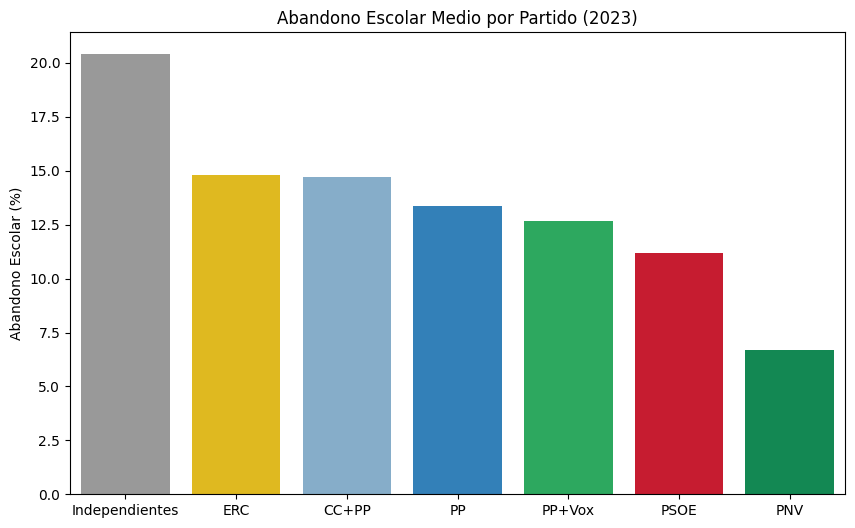

In [ ]:
df_politica_abandono = grupo_partido_reset.sort_values('Abandono Escolar (%)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_politica_abandono, x='Partido', y='Abandono Escolar (%)', palette=colores_partido, hue='Partido', legend=False)
plt.title('Abandono Escolar Medio por Partido (2023)')
plt.ylabel('Abandono Escolar (%)')
plt.xlabel('')
plt.show()

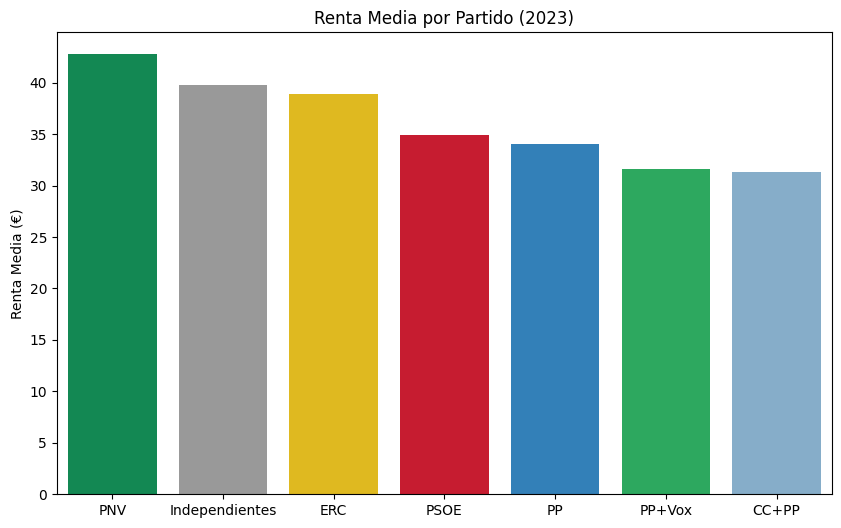

In [ ]:
df_politica_renta = grupo_partido_reset.sort_values('Renta Media', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_politica_renta, x='Partido', y='Renta Media', palette=colores_partido, hue='Partido', legend=False)
plt.title('Renta Media por Partido (2023)')
plt.ylabel('Renta Media (€)')
plt.xlabel('')
plt.show()

### Conclusión

A la vista de los datos, se aprecia que las comunidades gobernadas por partidos de **centro-derecha y derecha** tienden a situarse en la franja de **menor renta media y mayor abandono escolar**.  
En contraposición, comunidades gestionadas por formaciones de corte **progresista o nacionalista con fuerte inversión social** (PNV, PSOE) presentan en general **mayores rentas y abandono más bajo**.

Este patrón sugiere que, a pesar de los discursos políticos, ciertas políticas públicas de **educación, equidad y cohesión social** implementadas históricamente por partidos más progresistas parecen correlacionarse con **mejores resultados educativos y socioeconómicos**.

En cambio, en gobiernos conservadores donde se defiende una menor intervención pública y se fomenta la competitividad individual se observa cómo las diferencias de estatus social pueden perpetuar desigualdades en la educación pública, afectando especialmente a los sectores más vulnerables.

**En síntesis:** Más allá de la renta media, la apuesta política por la educación y la equidad marca la diferencia en los resultados escolares de cada comunidad autónoma.

> **Nota:** Estos datos son indicativos y deben considerarse junto a factores culturales, económicos y demográficos locales.
